In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

In [63]:
!conda activate CAR_PYTHON_POWER_BI

In [64]:
# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# To see all columns
pd.set_option('display.max_columns', None)

# Increase figsize for charts
sns.set({'figure.figsize':(8,8)})

# Remowe warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [65]:
# Load data set from CSV file

df = pd.read_csv(r"\Users\pkucharzak\Desktop\CAR_PYTHON_POWER_BI\CarPrice_Assignment.csv")

# Checking shape of dataframe
print(df.shape)

# Leading head of dataset
df.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [66]:
# Checking data information In loop version

for col in df.columns:
    unique = df[col].unique()
    unique_nr = len(unique)
    if unique_nr < 10:
        print(f"{col}: ---{unique}")
    else:
        print(f"{col}: ---{unique_nr}")


car_ID: ---205
symboling: ---[ 3  1  2  0 -1 -2]
CarName: ---147
fueltype: ---['gas' 'diesel']
aspiration: ---['std' 'turbo']
doornumber: ---['two' 'four']
carbody: ---['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ---['rwd' 'fwd' '4wd']
enginelocation: ---['front' 'rear']
wheelbase: ---53
carlength: ---75
carwidth: ---44
carheight: ---49
curbweight: ---171
enginetype: ---['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ---['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
enginesize: ---44
fuelsystem: ---['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
boreratio: ---38
stroke: ---37
compressionratio: ---32
horsepower: ---59
peakrpm: ---23
citympg: ---29
highwaympg: ---30
price: ---189


In [67]:
# chcecing is dataframe includes NA

df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [68]:
# Looking for data type and memory size

df.info(memory_usage = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [69]:
# Looking for quick summary

columns_int = [var for var in df.columns if (df[var].dtype != 'O')]

import researchpy as pg

print(pg.summarize(df[columns_int]))

                Name    N        Mean   Median       Variance         SD  \
0             car_ID  205       103.0    103.0      3519.1667    59.3226   
1          symboling  205      0.8341      1.0         1.5508     1.2453   
2          wheelbase  205     98.7566     97.0        36.2618     6.0218   
3          carlength  205    174.0493    173.2       152.2087    12.3373   
4           carwidth  205     65.9078     65.5         4.6019     2.1452   
5          carheight  205     53.7249     54.1         5.9708     2.4435   
6         curbweight  205   2555.5659   2414.0    271107.8743   520.6802   
7         enginesize  205    126.9073    120.0      1734.1139    41.6427   
8          boreratio  205      3.3298     3.31         0.0734     0.2708   
9             stroke  205      3.2554     3.29         0.0983     0.3136   
10  compressionratio  205     10.1425      9.0        15.7771      3.972   
11        horsepower  205    104.1171     95.0      1563.7411    39.5442   
12          

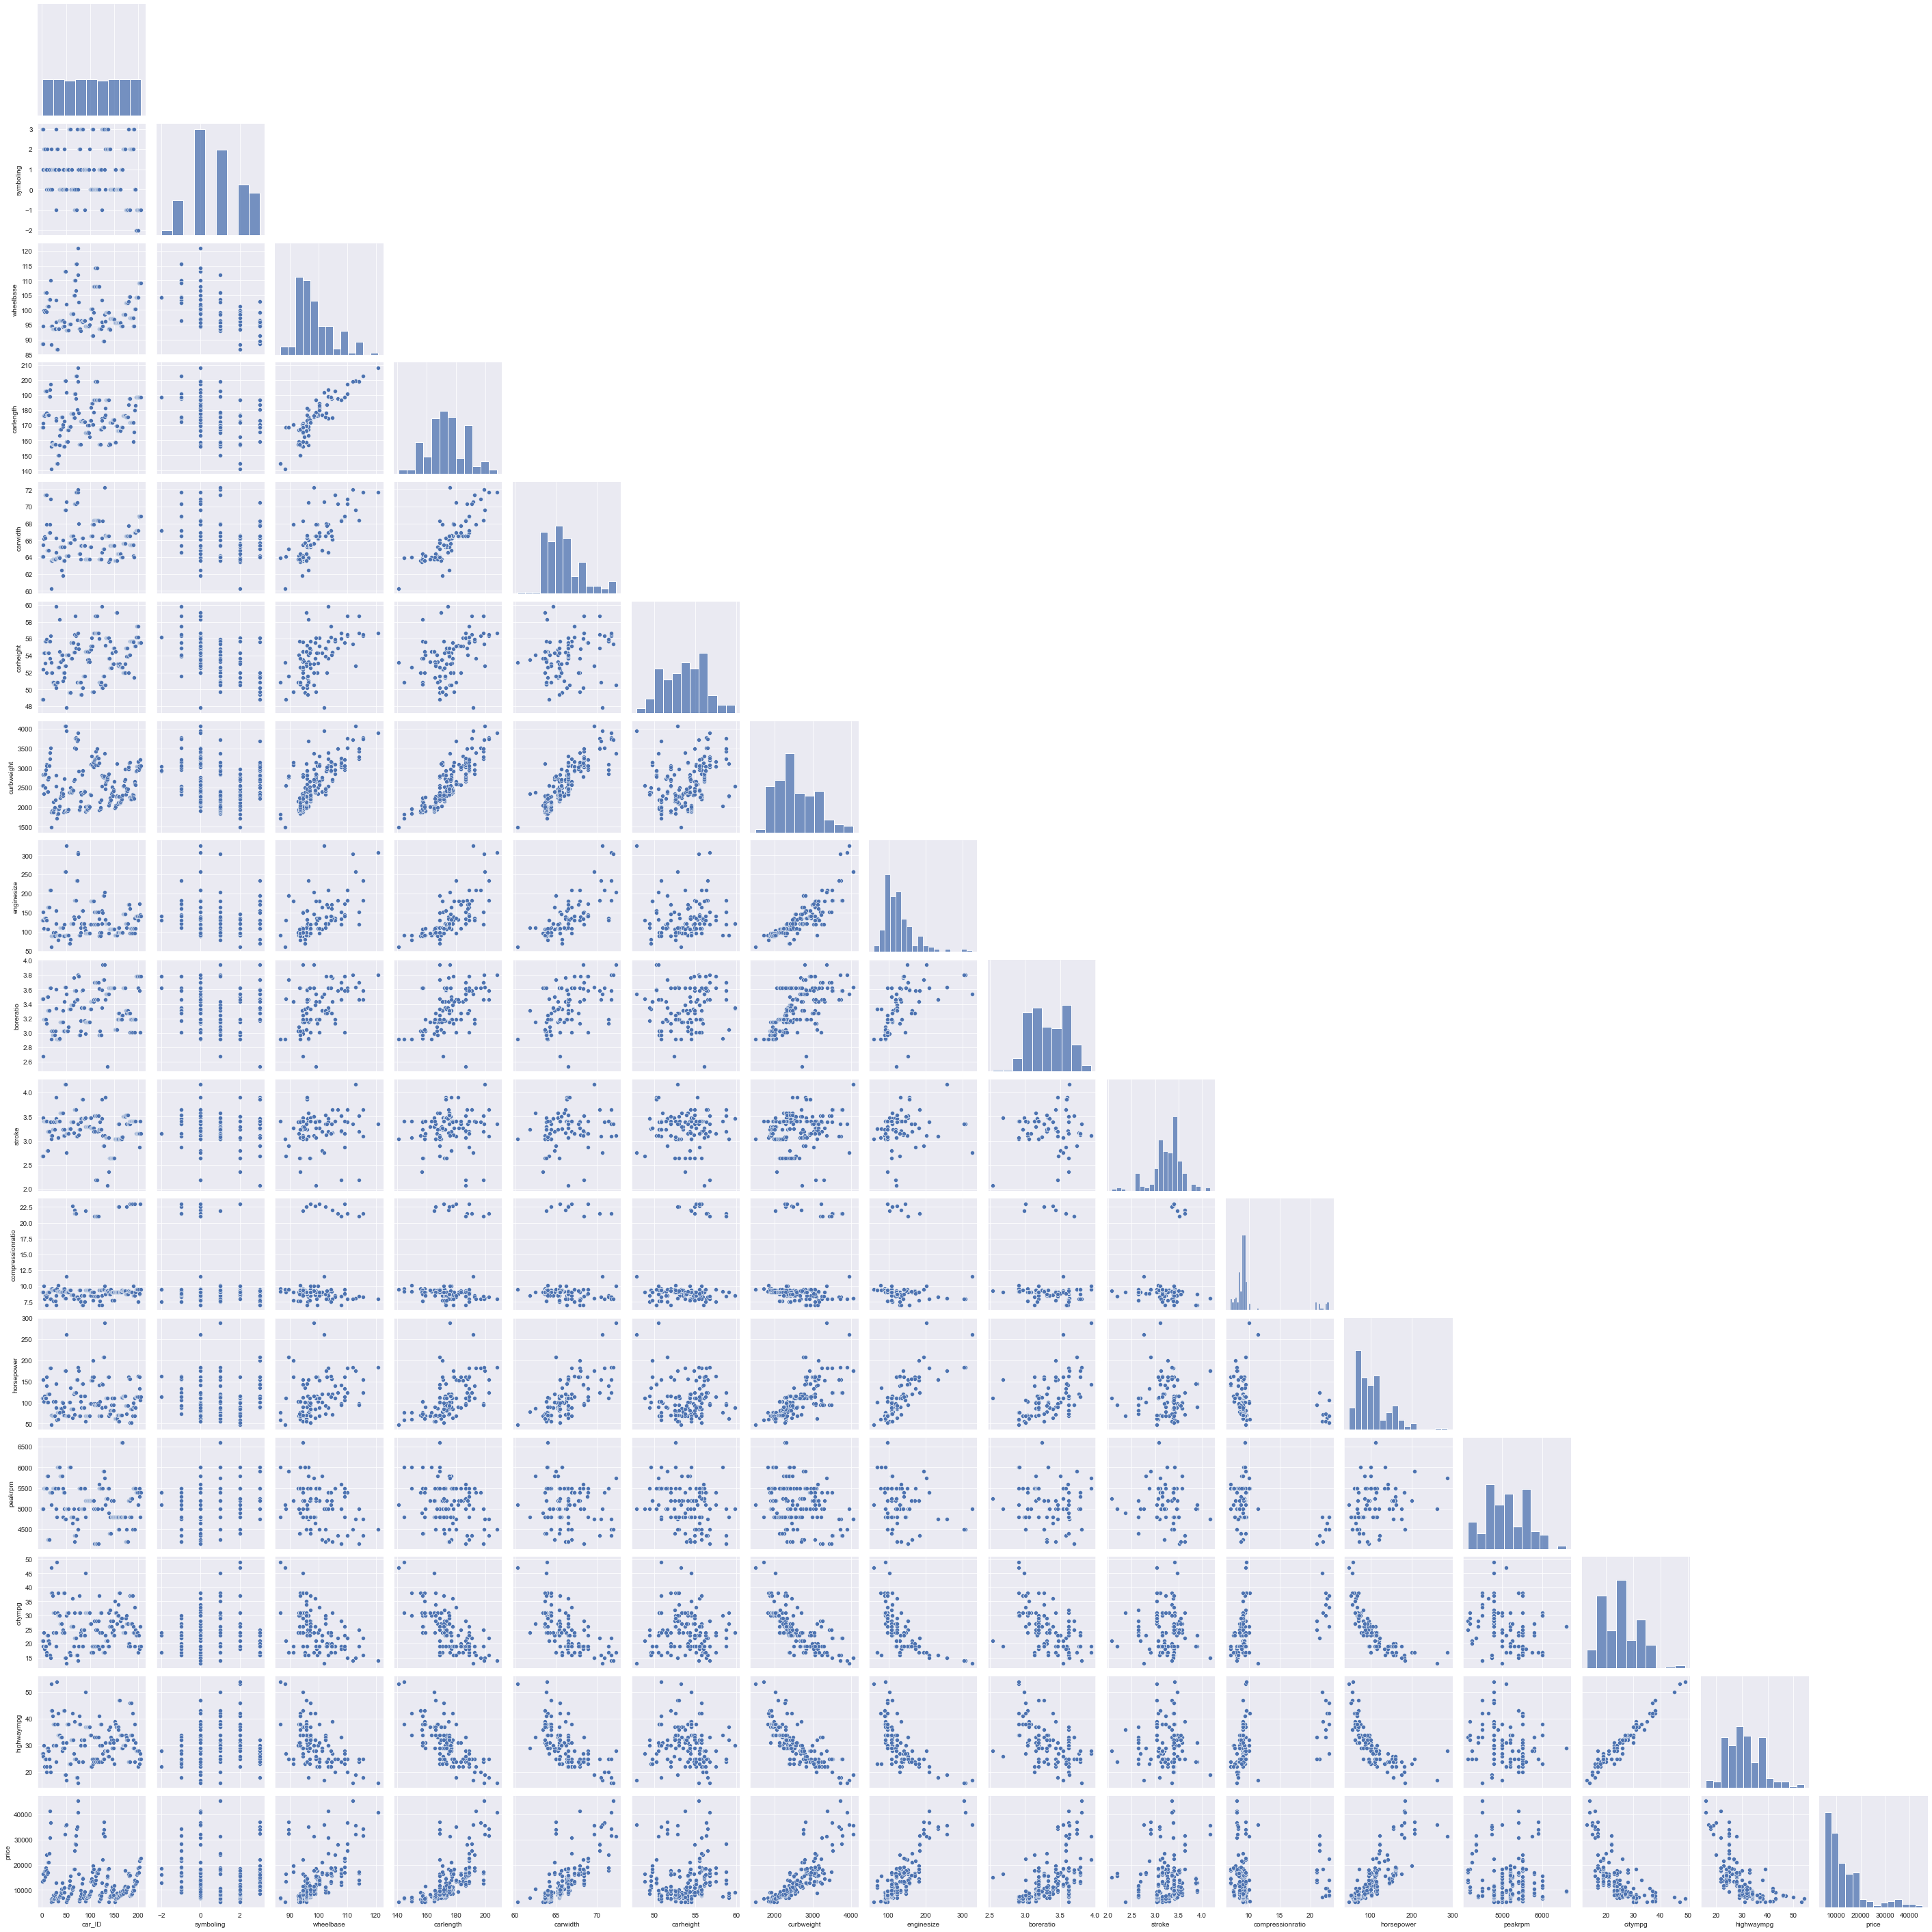

In [9]:
# Looking for quick relation between columns

Pair = sns.pairplot(df, corner=True)
Pair

In [70]:
df[columns_int]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


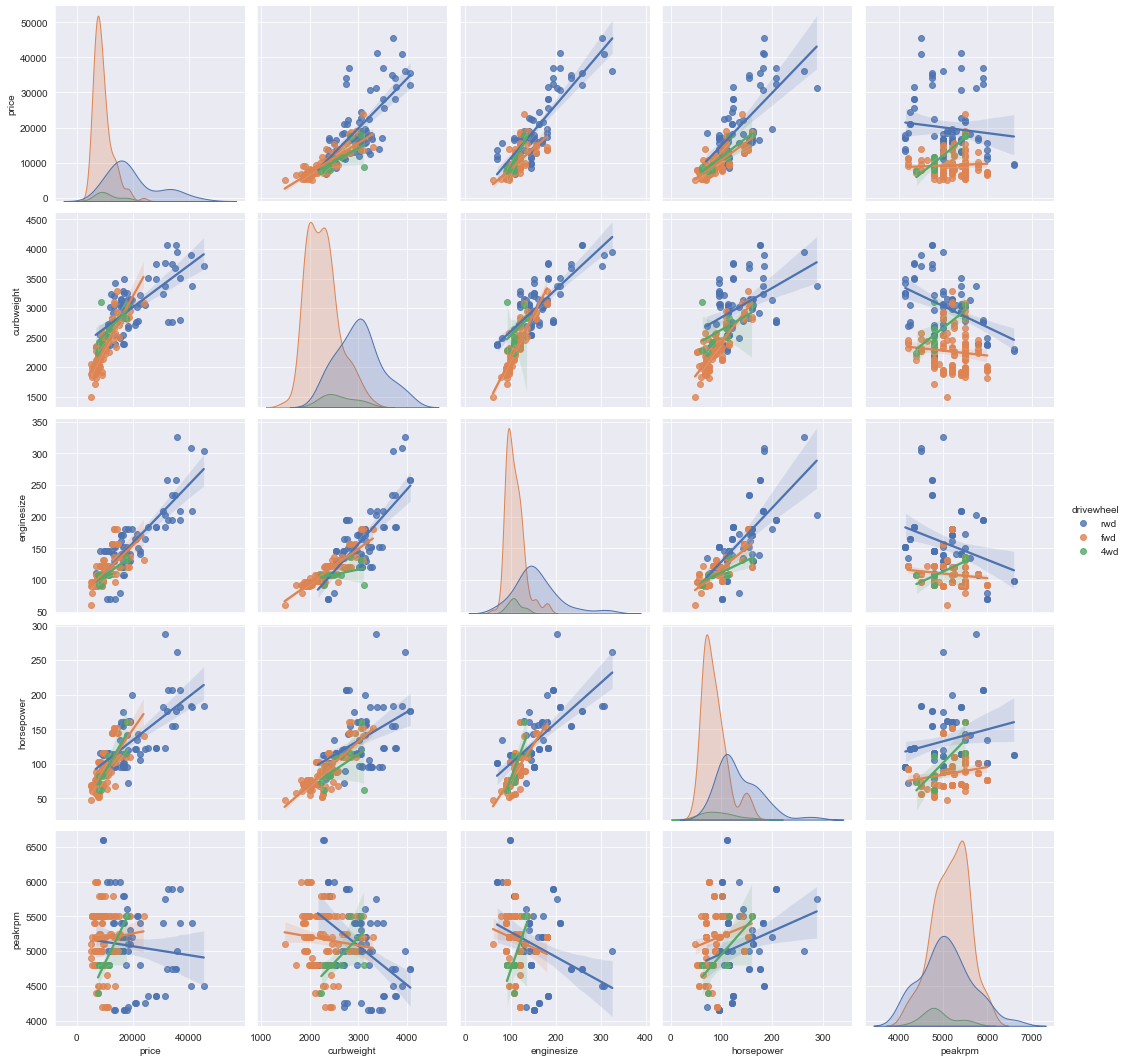

In [71]:
# looking closer into some colums values which seems to be correlated

p = sns.pairplot(df[['price','curbweight','enginesize','horsepower','peakrpm', 'drivewheel']], hue = 'drivewheel', kind = 'reg', height = 3)

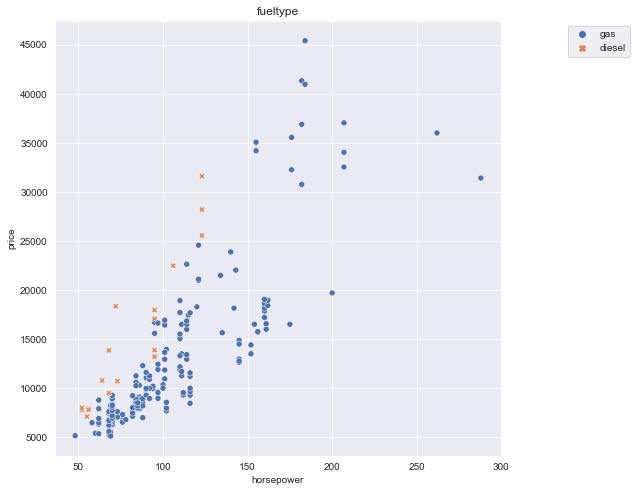

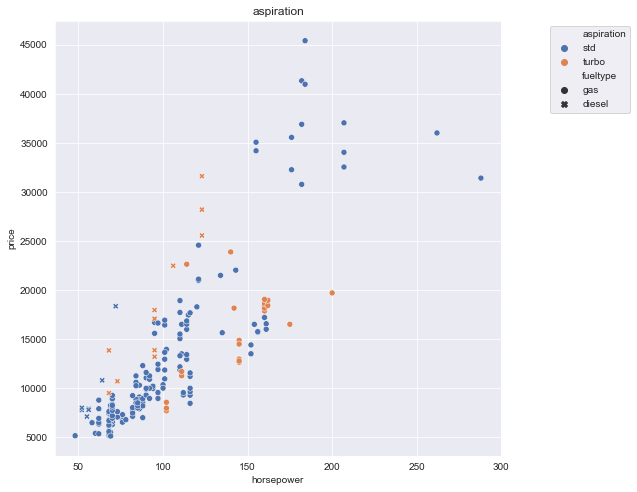

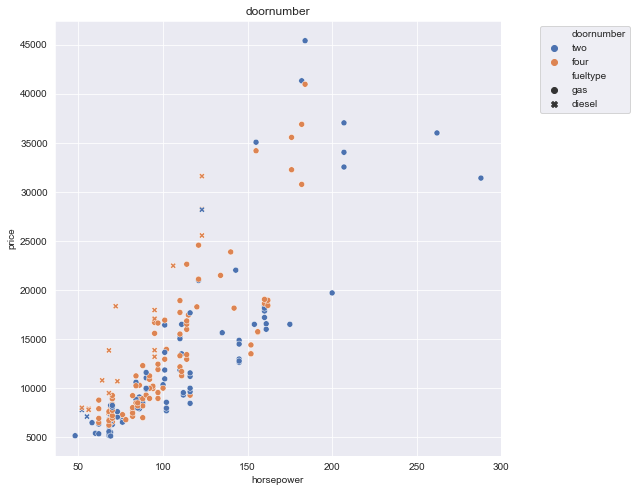

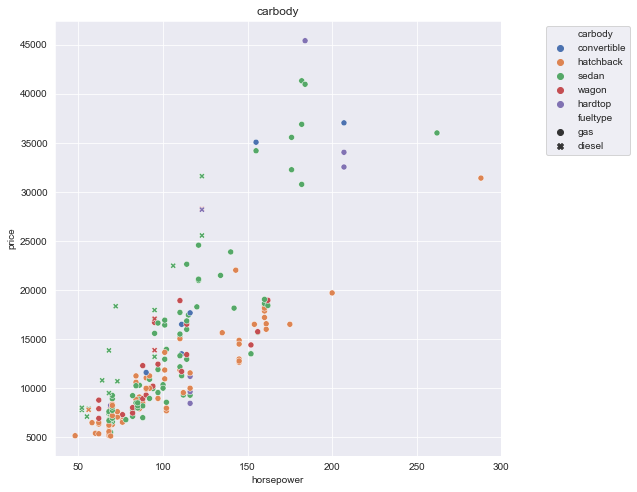

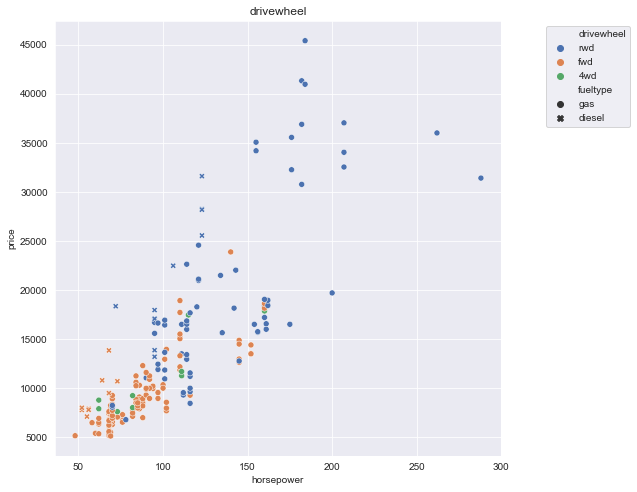

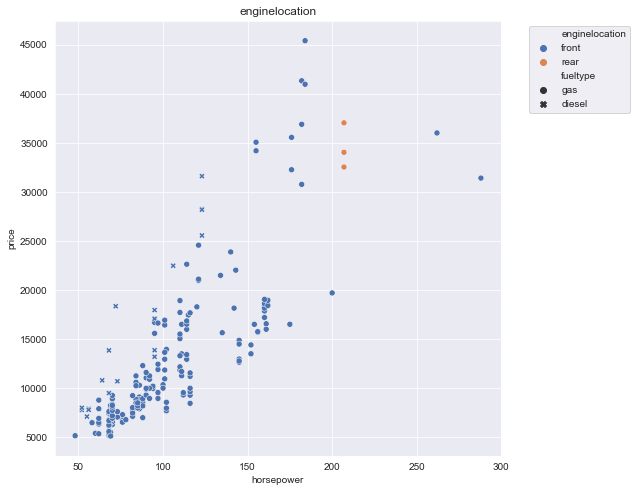

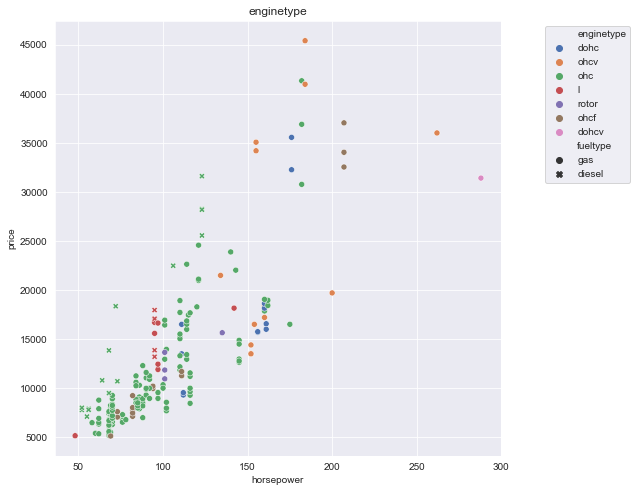

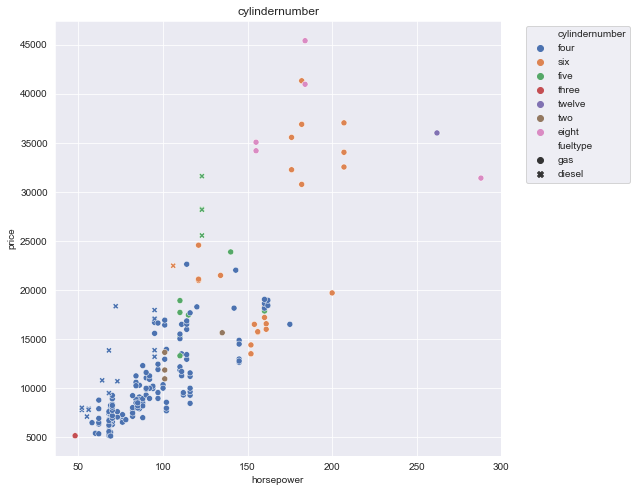

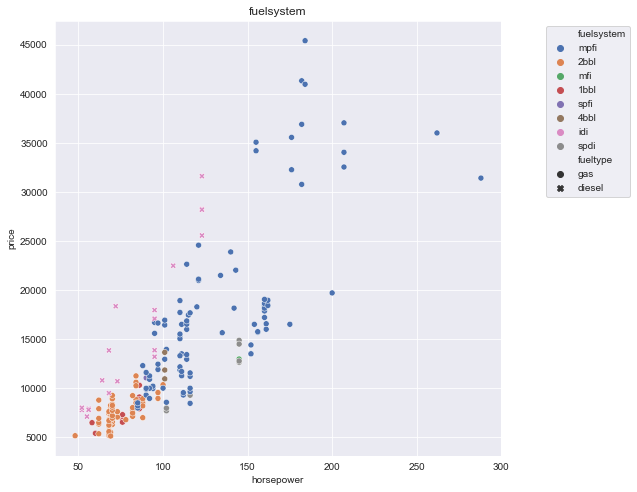

In [72]:
# Looking for correlation between price vs ['curbweight','enginesize','horsepower','peakrpm', 'drivewheel']
df_obj = [var for var in df.columns if (df[var].dtypes == 'O') & (var != 'CarName')]

for var in df_obj:
    sns.scatterplot(x = 'horsepower', y = 'price', data = df, hue = var, style = 'fueltype')
    plt.title(var)
    plt.legend(bbox_to_anchor = (1.3,1))
    plt.show()
    

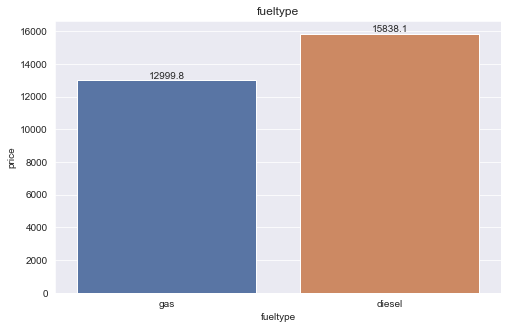

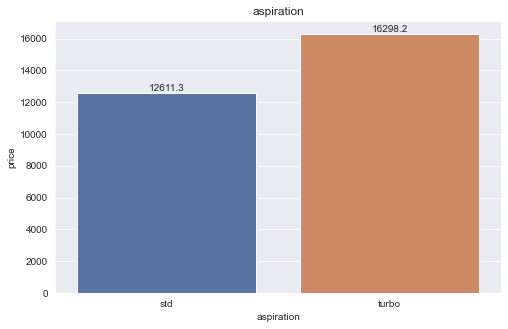

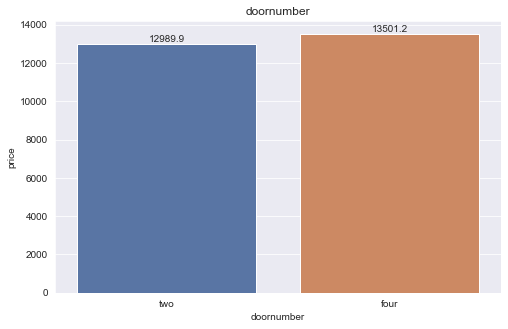

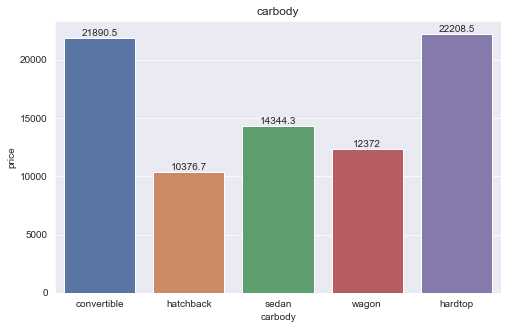

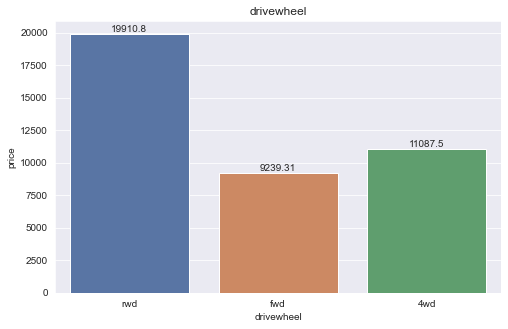

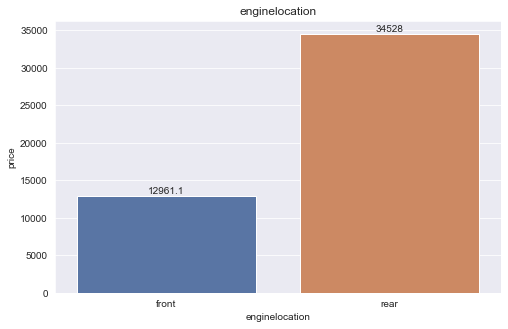

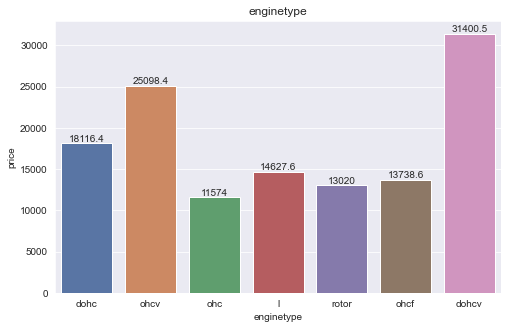

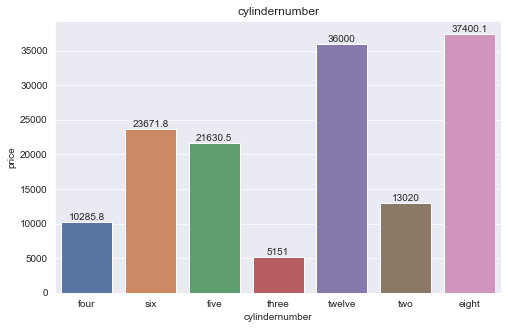

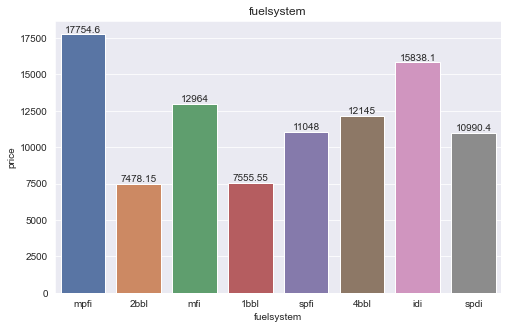

,price
carbody,
convertible,21890.500000
hardtop,22208.500000
hatchback,10376.652386
sedan,14344.270833
wagon,12371.960000


In [73]:
# Looking at categorical values
%matplotlib inline

sns.set({'figure.figsize':(8,5)})

for var in df_obj:
    ax = sns.barplot(x = var, y = 'price', data = df, ci = False)
    for container in ax.containers:
        ax.bar_label(container)
        plt.title(var)
        plt.show()
    
df.groupby('carbody').agg({'price':'mean'})

# Distribution

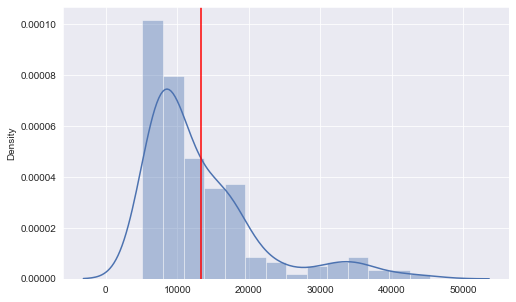

In [74]:
# Now lets look for distribution 

#create variable for price columns
x = df['price'].values

#show it in distplot
sns.distplot(x)

#create variable fo rmean value
mean = df['price'].mean()

#making vertical line using mean variable
plt.axvline(mean,c = 'red')
plt.show()

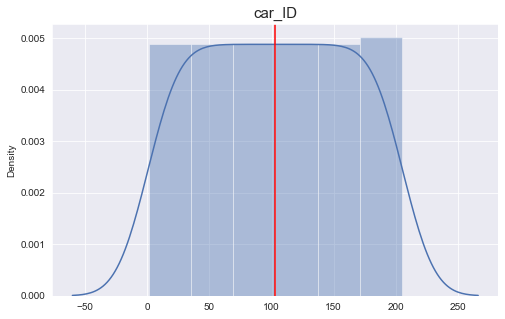

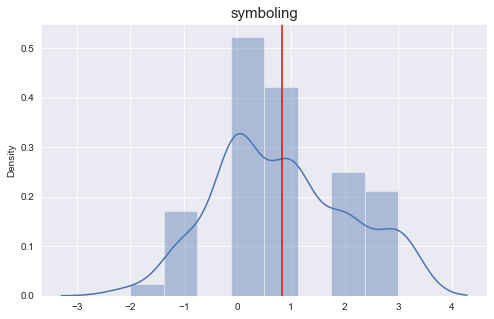

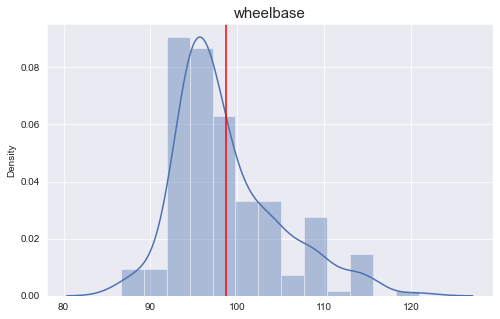

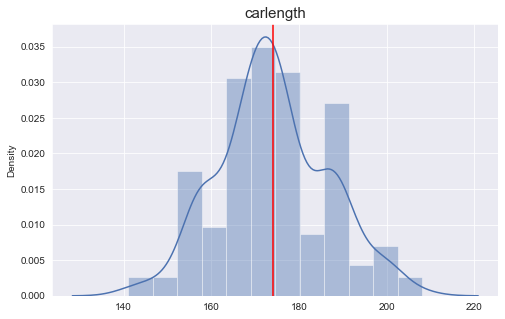

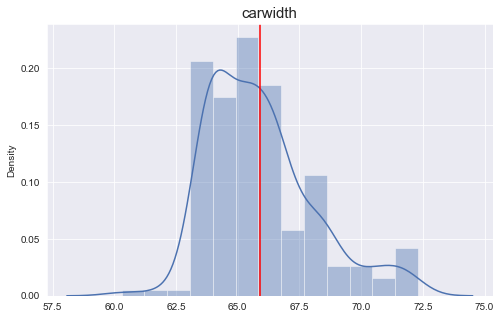

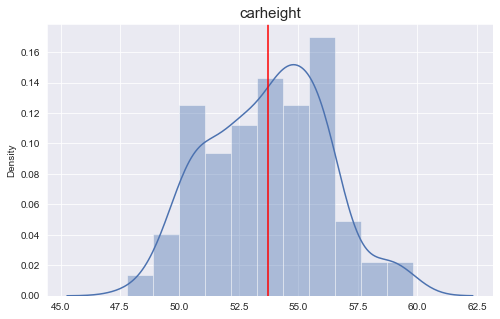

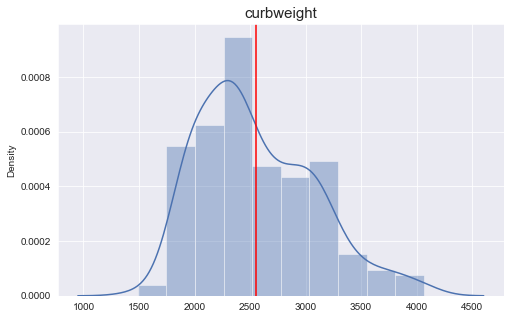

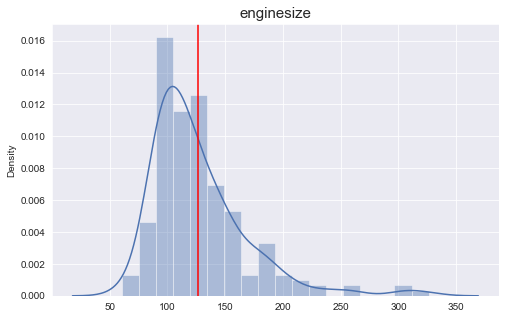

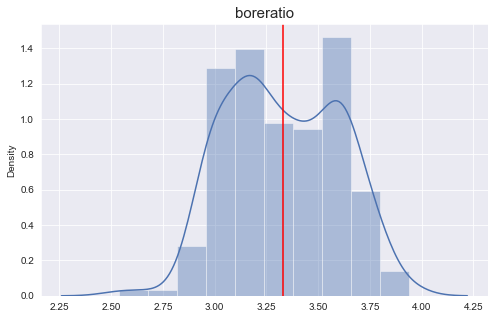

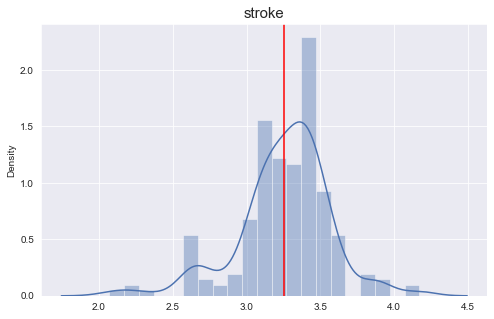

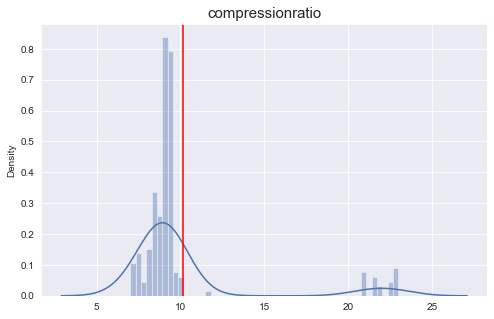

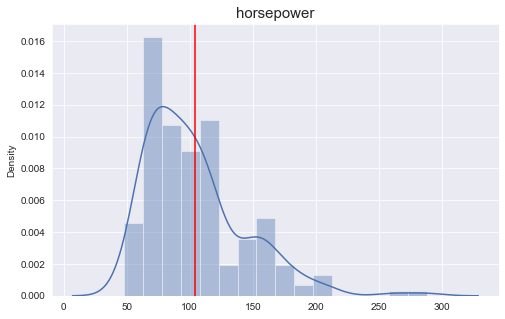

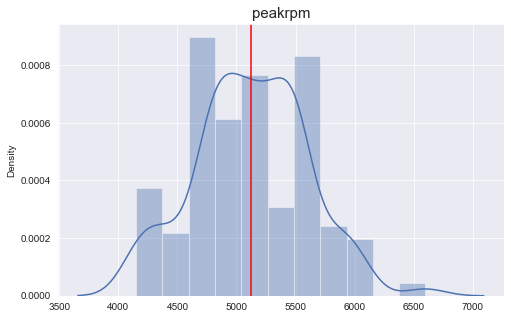

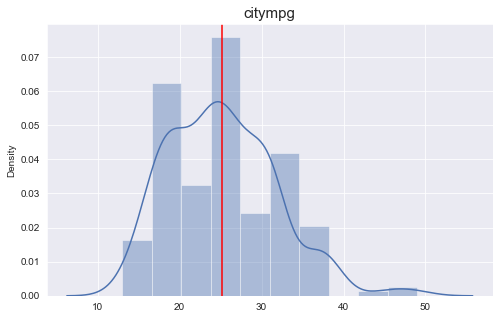

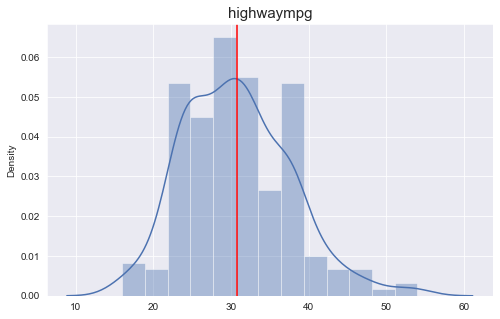

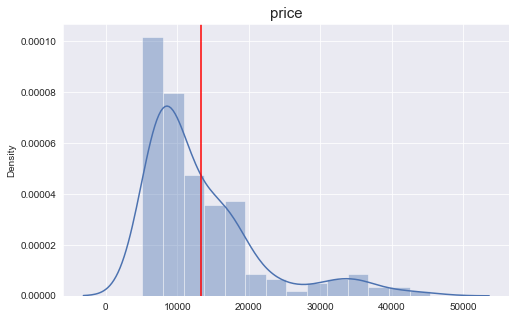

In [75]:
# Looping throught all other variables

for v in columns_int:
    
    # as in first example first im creating variable for values
    x = df[v].values
    
    # showing chart with distplot
    sns.distplot(x)
    
    # creating variable for mean
    mean = df[v].mean()
    
    # adding vertical line into chart
    plt.axvline(mean, color = 'red')
    plt.title(v, fontsize = 15)
    plt.show()

# DIstribution and Outlyers

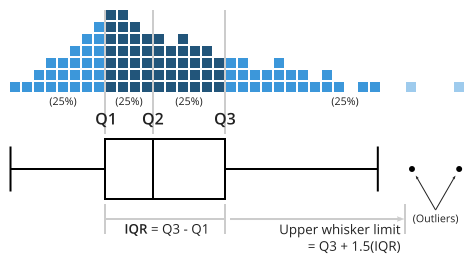

In [76]:
import os
from IPython.display import Image

path = "C:\\Users\\pkucharzak\\Desktop\\CAR_PYTHON_POWER_BI\\box-plot-construction.png"
Image(filename = path, height = 1000, width = 800)

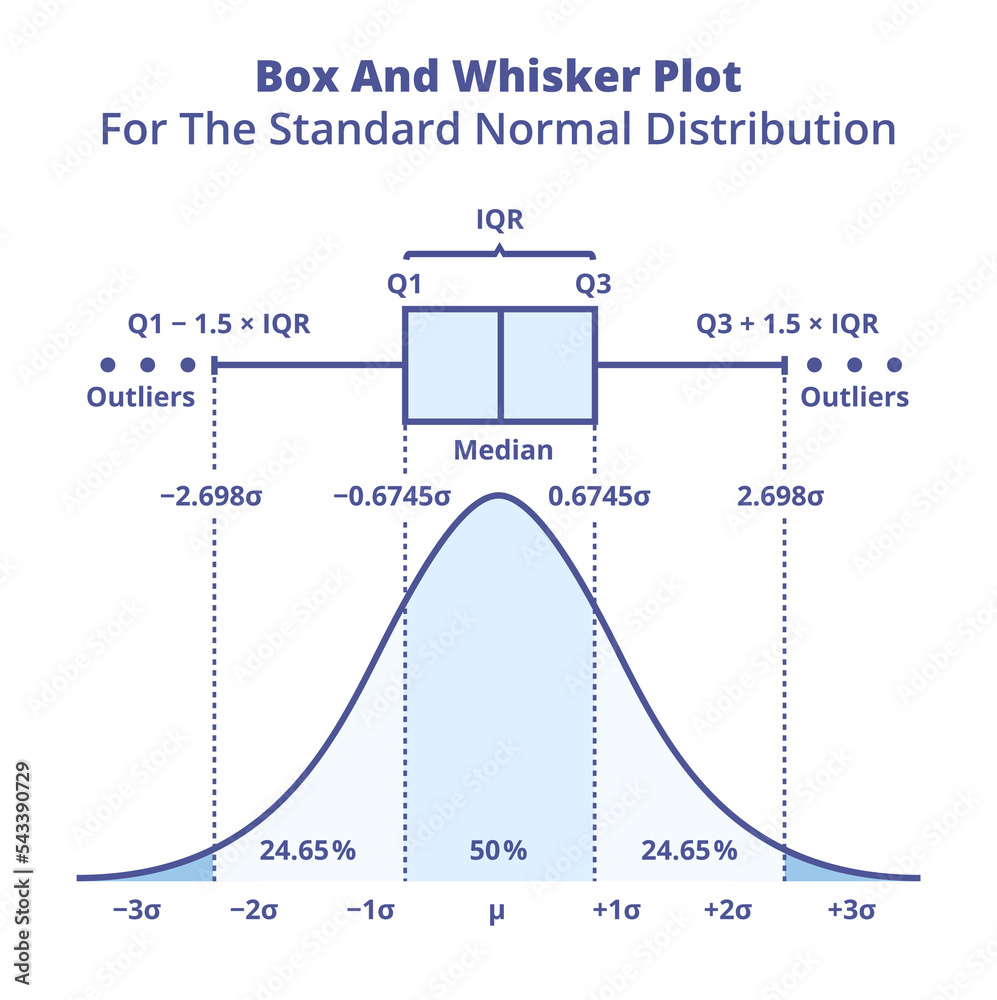

In [77]:
path = "C:\\Users\\pkucharzak\\Desktop\\CAR_PYTHON_POWER_BI\\box_plot.jpg"
Image(filename = path, height = 500, width = 500)

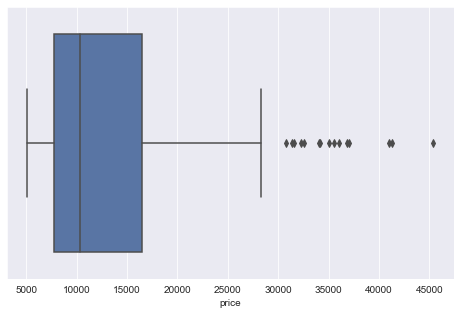

In [78]:
sns.boxplot('price', data = df)
plt.show()

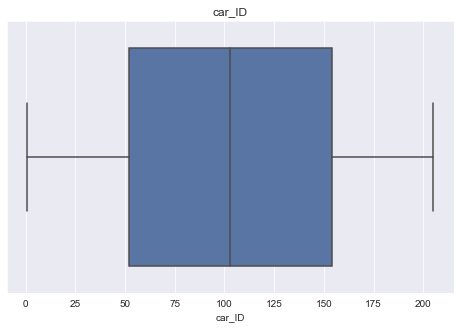

Median value for car_ID:103.0
Mean value for car_ID:103.0
Q1 value for car_ID:52.0
Q3 value for car_ID:154.0
IQR value for car_ID:102.0
Max_whisker value for car_ID:307.0


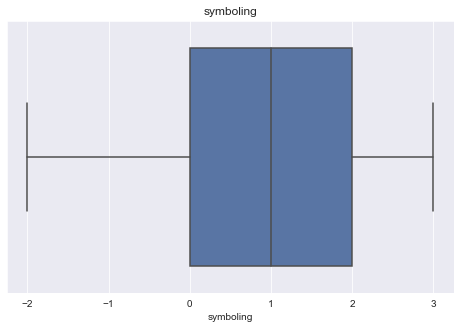

Median value for symboling:1.0
Mean value for symboling:0.83
Q1 value for symboling:0.0
Q3 value for symboling:2.0
IQR value for symboling:2.0
Max_whisker value for symboling:5.0


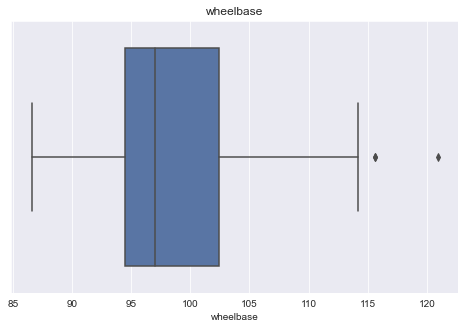

Median value for wheelbase:97.0
Mean value for wheelbase:98.76
Q1 value for wheelbase:94.5
Q3 value for wheelbase:102.4
IQR value for wheelbase:7.9
Max_whisker value for wheelbase:114.25


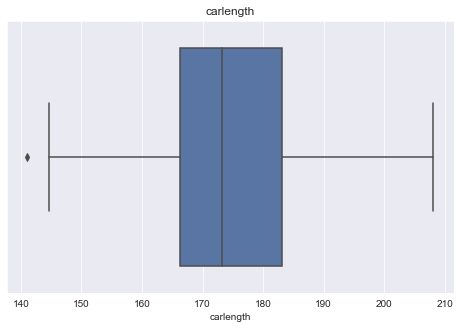

Median value for carlength:173.2
Mean value for carlength:174.05
Q1 value for carlength:166.3
Q3 value for carlength:183.1
IQR value for carlength:16.8
Max_whisker value for carlength:208.3


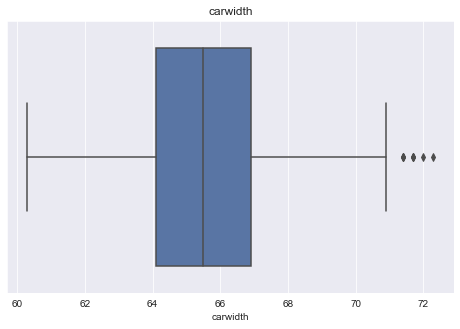

Median value for carwidth:65.5
Mean value for carwidth:65.91
Q1 value for carwidth:64.1
Q3 value for carwidth:66.9
IQR value for carwidth:2.8
Max_whisker value for carwidth:71.1


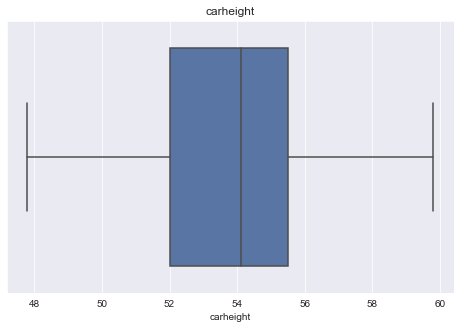

Median value for carheight:54.1
Mean value for carheight:53.72
Q1 value for carheight:52.0
Q3 value for carheight:55.5
IQR value for carheight:3.5
Max_whisker value for carheight:60.75


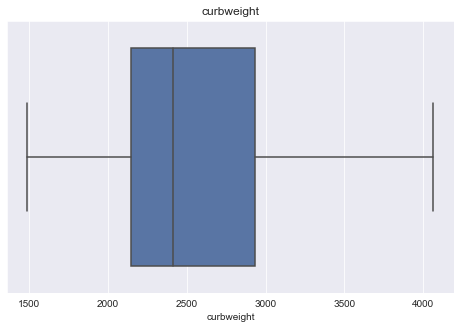

Median value for curbweight:2414.0
Mean value for curbweight:2555.57
Q1 value for curbweight:2145.0
Q3 value for curbweight:2935.0
IQR value for curbweight:790.0
Max_whisker value for curbweight:4120.0


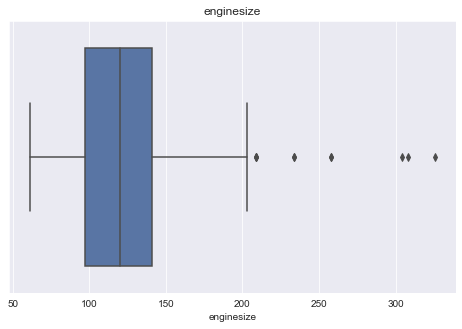

Median value for enginesize:120.0
Mean value for enginesize:126.91
Q1 value for enginesize:97.0
Q3 value for enginesize:141.0
IQR value for enginesize:44.0
Max_whisker value for enginesize:207.0


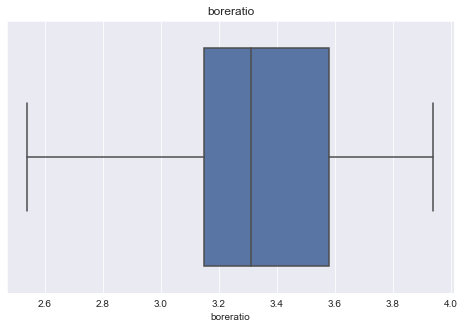

Median value for boreratio:3.31
Mean value for boreratio:3.33
Q1 value for boreratio:3.15
Q3 value for boreratio:3.58
IQR value for boreratio:0.43
Max_whisker value for boreratio:4.23


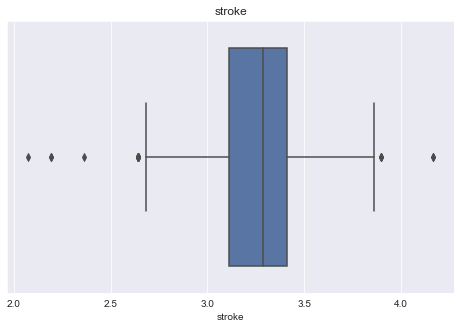

Median value for stroke:3.29
Mean value for stroke:3.26
Q1 value for stroke:3.11
Q3 value for stroke:3.41
IQR value for stroke:0.3
Max_whisker value for stroke:3.86


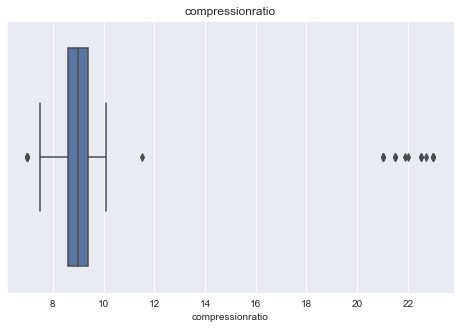

Median value for compressionratio:9.0
Mean value for compressionratio:10.14
Q1 value for compressionratio:8.6
Q3 value for compressionratio:9.4
IQR value for compressionratio:0.8
Max_whisker value for compressionratio:10.6


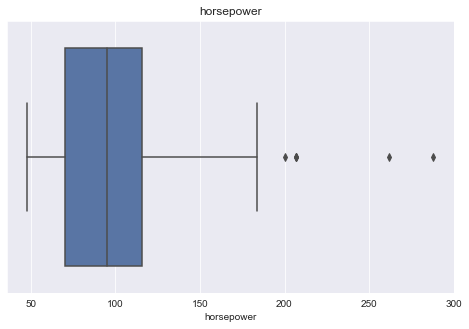

Median value for horsepower:95.0
Mean value for horsepower:104.12
Q1 value for horsepower:70.0
Q3 value for horsepower:116.0
IQR value for horsepower:46.0
Max_whisker value for horsepower:185.0


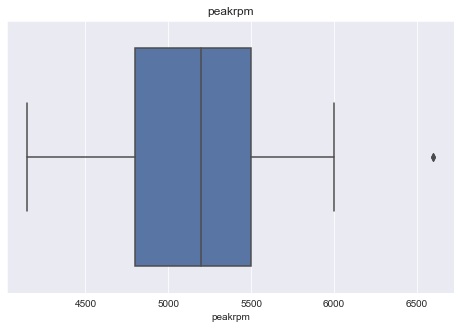

Median value for peakrpm:5200.0
Mean value for peakrpm:5125.12
Q1 value for peakrpm:4800.0
Q3 value for peakrpm:5500.0
IQR value for peakrpm:700.0
Max_whisker value for peakrpm:6550.0


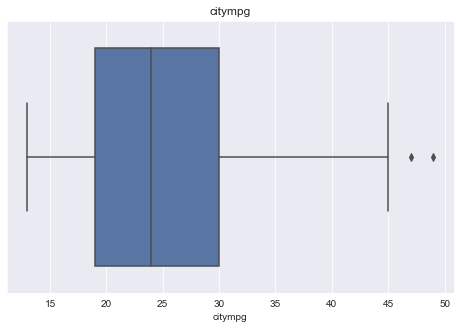

Median value for citympg:24.0
Mean value for citympg:25.22
Q1 value for citympg:19.0
Q3 value for citympg:30.0
IQR value for citympg:11.0
Max_whisker value for citympg:46.5


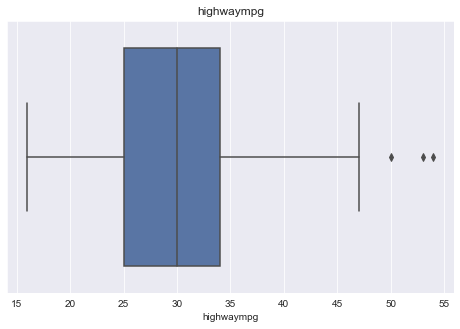

Median value for highwaympg:30.0
Mean value for highwaympg:30.75
Q1 value for highwaympg:25.0
Q3 value for highwaympg:34.0
IQR value for highwaympg:9.0
Max_whisker value for highwaympg:47.5


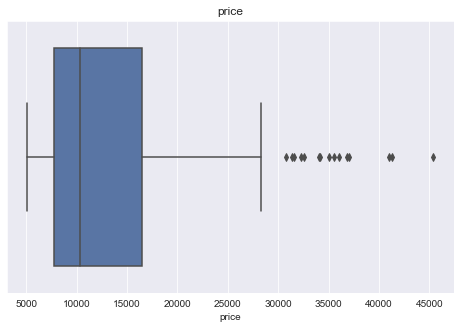

Median value for price:10295.0
Mean value for price:13276.71
Q1 value for price:7788.0
Q3 value for price:16503.0
IQR value for price:8715.0
Max_whisker value for price:29575.5


In [79]:
# Looping throught numerical columns 

for v in columns_int:
    
    # visualize distribution and qutlyers in boxplot
    sns.boxplot(x = v, data = df)
    
    # Median variable
    median = df[v].median()
    
    # Mean variable
    mean = df[v].mean()
    
    # Box variable measures
    q1 = df[v].quantile(0.25)
    q3 = df[v].quantile(0.75)
    IQR = q3 -q1
    Max_whisker = q3 + 1.5 * IQR
    
    plt.title(v)
    plt.show()
    
    # Under chart values from measures
    print(f"Median value for {v}:{median}")
    print(f"Mean value for {v}:{round(mean,2)}")
    print(f"Q1 value for {v}:{q1}")  
    print(f"Q3 value for {v}:{q3}")
    print(f"IQR value for {v}:{round(IQR,2)}")  
    print(f"Max_whisker value for {v}:{round(Max_whisker,2)}")                

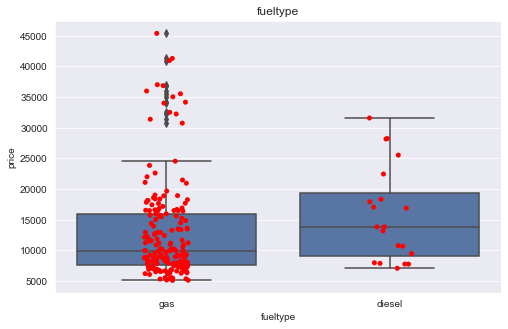

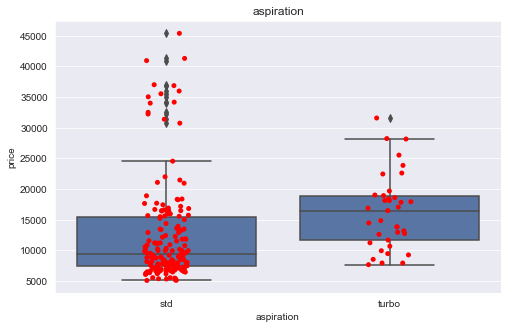

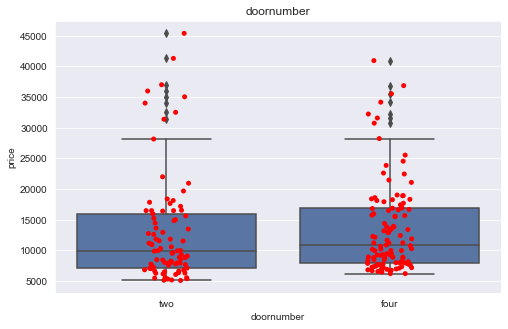

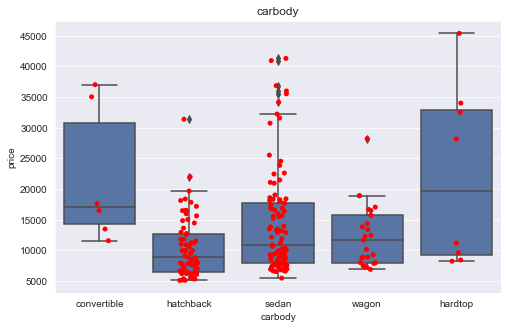

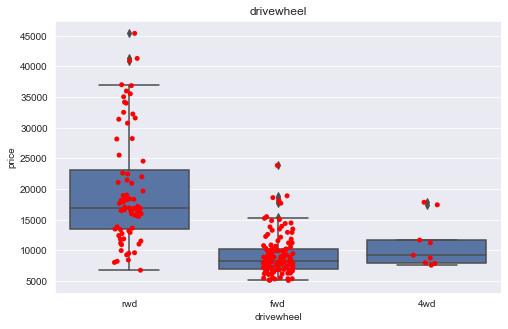

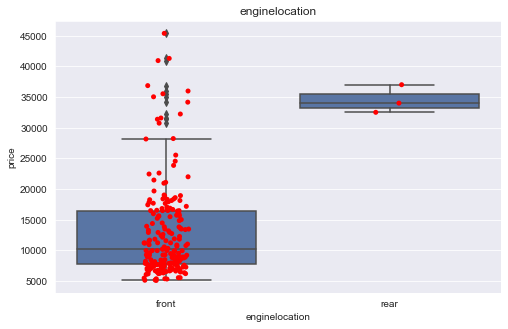

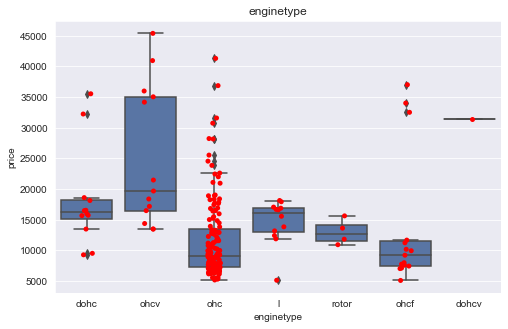

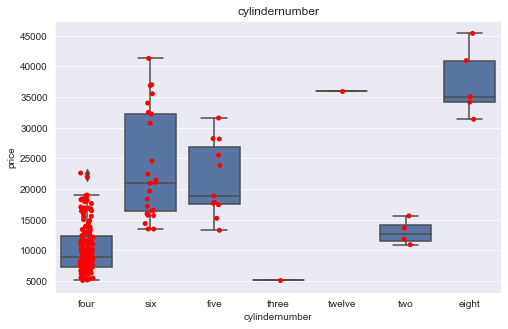

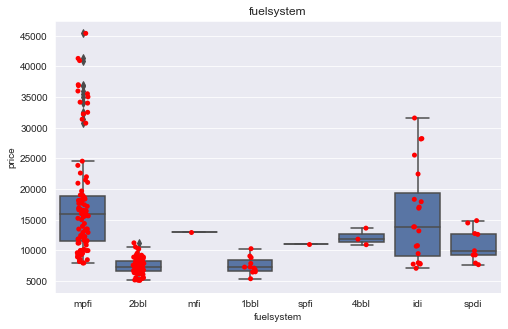

In [80]:
# Looping throught categorical columns in box plot

for var in df_obj:
    
    #comparing box plot with strip plot for better visualization about value_counts
    sns.boxplot(x = var, y = 'price', data = df , color = '#4C72B0')
    sns.stripplot(x = var, y = 'price', data = df , color = 'red',  )
    
    plt.title(var)
    plt.show()

# Preparing data into into Linear Regression and ML

In [81]:
# My data set
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [83]:
# Changing type for category which will help me to exclude this column in variable list

df['CarName'] = df['CarName'].astype('category')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    category
 3   fueltype          205 non-null    object  
 4   aspiration        205 non-null    object  
 5   doornumber        205 non-null    object  
 6   carbody           205 non-null    object  
 7   drivewheel        205 non-null    object  
 8   enginelocation    205 non-null    object  
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    object  
 15  cylindernumber    205 non-null    object  
 16  enginesize        205 non-

In [85]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [86]:
# Selecting Categorical column into processing

print(f"List of categorical columns: {df_obj}")
print( )
print(f"List of numerical columns: {columns_int}")

#Note:
#Car_name was taken one and will be droped for ML and LR

List of categorical columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

List of numerical columns: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [87]:
# Mapping Cylindernumber to int

map_dict = (
    {
    "two":2,
    "three":3,
    "four":4,
    "five":5,
    "six":6,
    "eight":8,
    "twelve":12
    }
)

df['cylindernr'] = df['cylindernumber'].map(map_dict)

In [88]:
# Droping old column after mapping

df.drop('cylindernumber', axis = 1, inplace = True)

In [89]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cylindernr
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,4
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,4
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,6
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,4
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,5


In [97]:
# Making new variables for categorical numbers

col_cat_ml = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype']

In [98]:
# Making new dataframe with converted categorical values into numerical

new_df = pd.get_dummies(df, columns = col_cat_ml)

In [99]:
print(new_df.shape)
new_df.head()

(205, 49)


,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cylindernr,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,4,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,4,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,6,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,4,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,5,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


# Looking for coefficient.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    category
 3   fueltype          205 non-null    object  
 4   aspiration        205 non-null    object  
 5   doornumber        205 non-null    object  
 6   carbody           205 non-null    object  
 7   drivewheel        205 non-null    object  
 8   enginelocation    205 non-null    object  
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    object  
 15  enginesize        205 non-null    int64   
 16  fuelsystem        205 non-

In [34]:
col_int_ml = [var for var in df.columns if (df[var].dtype != 'O') and (df[var].dtype != 'category') and (var!= 'car_ID')]

<Axes: >

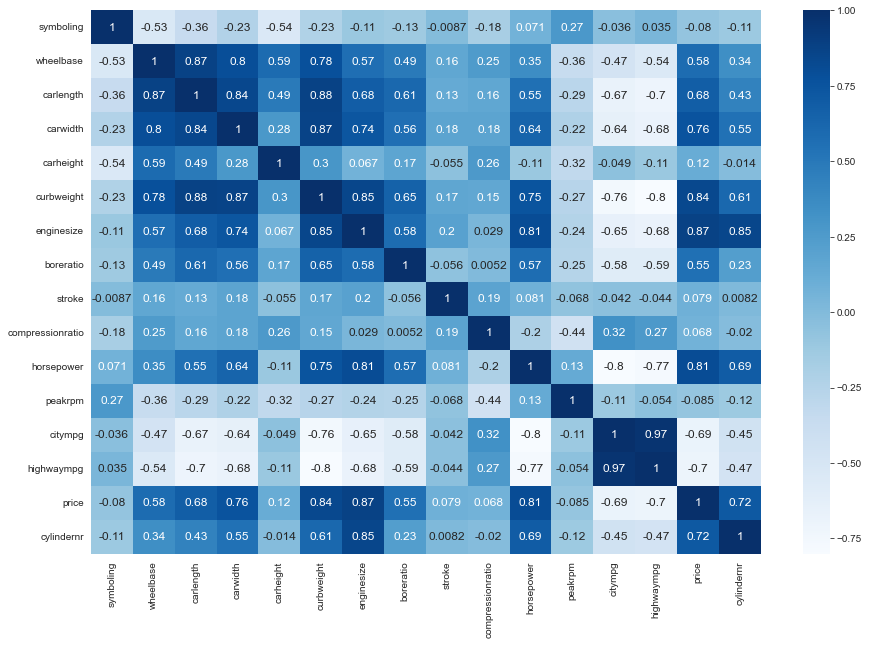

In [185]:
sns.set({'figure.figsize':(15,10)})

sns.heatmap(new_df[col_int_ml].corr(), annot = True, cmap = 'Blues', annot_kws={'size':12})

In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   car_ID                 205 non-null    int64   
 1   symboling              205 non-null    int64   
 2   CarName                205 non-null    category
 3   wheelbase              205 non-null    float64 
 4   carlength              205 non-null    float64 
 5   carwidth               205 non-null    float64 
 6   carheight              205 non-null    float64 
 7   curbweight             205 non-null    int64   
 8   enginesize             205 non-null    int64   
 9   boreratio              205 non-null    float64 
 10  stroke                 205 non-null    float64 
 11  compressionratio       205 non-null    float64 
 12  horsepower             205 non-null    int64   
 13  peakrpm                205 non-null    int64   
 14  citympg                205 non-null    int

In [101]:

# Drop CarName column

new_df = new_df.drop('CarName', axis = 1)
# new_df = new_df.drop('car_ID', axis = 1)
new_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cylindernr,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,4,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,4,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,6,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,4,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,5,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


# Feature Importance

Steps of Running Feature Importance

    -Split the data into X & y

    -Run a Tree-based estimators (i.e. decision trees & random forests)

    -Run Feature Importance

    -We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature

    -More info: https://christophm.github.io/interpretable-ml-book/feature-importance.html


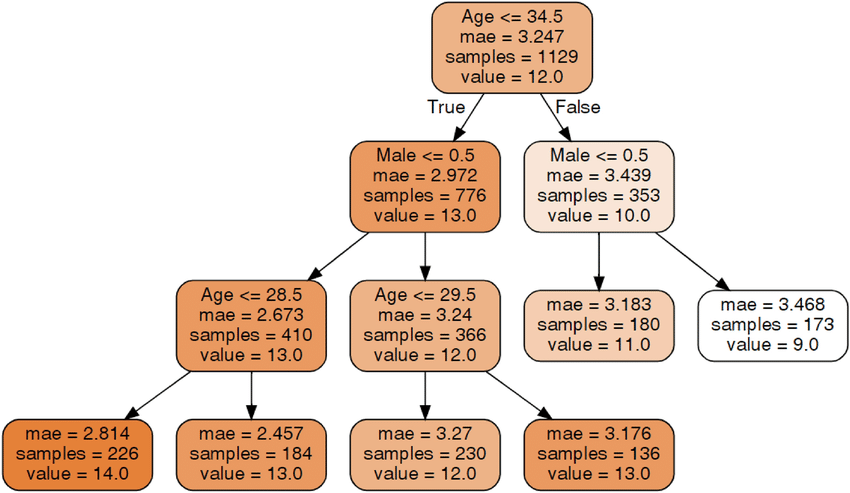

In [38]:
path = "C:\\Users\\pkucharzak\\Desktop\\CAR_PYTHON_POWER_BI\\Decision_tree.png"
Image(path, height=600, width = 800)

In [142]:
# Lets find X & y varaible for futher model

X = new_df.drop(['price'], axis=1).values
y = new_df['price'].astype(int)
X_columns = new_df.drop(['price'], axis = 1)

# Checking how many cols and rows i have
print(X.shape)
print(y.shape)

(205, 47)
(205,)


In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
# make Decision Tree
dt=DecisionTreeClassifier(random_state=15, criterion ='entropy', max_depth = 10)

In [145]:
# fit Decision Tre with variables
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [146]:
# Showing features
dt.feature_importances_

array([0.097831, 0.018767, 0.096667, 0.066327, 0.012715, 0.117358,
       0.250450, 0.018131, 0.025618, 0.029453, 0.037326, 0.076420,
       0.017994, 0.057965, 0.010056, 0.000000, 0.001297, 0.001297,
       0.003083, 0.012650, 0.003083, 0.000000, 0.003083, 0.011192,
       0.005187, 0.001786, 0.006258, 0.000000, 0.000000, 0.000000,
       0.000000, 0.001786, 0.000000, 0.001786, 0.000000, 0.009567,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.001786,
       0.000000, 0.001786, 0.001297, 0.000000, 0.000000])

In [190]:
del f_fi
# Connecting features with column name 
# Building DataFrame to show results sorted

for i, column in enumerate(new_df.drop(['price'], axis = 1)):
    print(f"Importance column {column}: {dt.feature_importances_[i]}")
    
    fi = pd.DataFrame({'Variable':[column],'Importance':[dt.feature_importances_[i]]})
    try:
        f_fi = pd.concat([f_fi,fi],ignore_index = False)
    except:
        f_fi = fi
    
f_fi = f_fi.sort_values('Importance', ascending = False)
f_fi

Importance column car_ID: 0.09783128126107031
Importance column symboling: 0.01876715318517224
Importance column wheelbase: 0.096666812118302
Importance column carlength: 0.06632673417250025
Importance column carwidth: 0.012714597764003039
Importance column carheight: 0.11735760037106055
Importance column curbweight: 0.25044971961729906
Importance column enginesize: 0.01813144406628569
Importance column boreratio: 0.025617547531335123
Importance column stroke: 0.0294531310842074
Importance column compressionratio: 0.03732563400063573
Importance column horsepower: 0.07641975190237194
Importance column peakrpm: 0.017993560471353514
Importance column citympg: 0.05796477348352405
Importance column highwaympg: 0.01005630627686809
Importance column cylindernr: 0.0
Importance column carbody_convertible: 0.0012967701045389207
Importance column carbody_hardtop: 0.0012967701045389207
Importance column carbody_hatchback: 0.0030829979816256645
Importance column carbody_sedan: 0.012649846485945934


,Variable,Importance
0,curbweight,0.250450
0,carheight,0.117358
0,car_ID,0.097831
0,wheelbase,0.096667
0,horsepower,0.076420
0,carlength,0.066327
0,citympg,0.057965
0,compressionratio,0.037326
0,stroke,0.029453
0,boreratio,0.025618


# Spliting Data

In [148]:
# I will use sklearn select_model train_test_split to make in proper way

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = .80,test_size = 0.2, random_state = 15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(164, 47)
(41, 47)
(164,)
(41,)


What is Linear Regression Analysis

    -Linear regression is a widely used machine learning model that predicts continues numbers as outputs; not classes
    -It models the relationship of 2 plus variables by fitting a linear equation to observed data
    -In linear regression you have 1 dependent variable (y) and 1 plus independent variables (X)
    -Before you attempt to model the data, you should check if there is a relationship between the variables first; a good way is to use a scatterplot to visualise the data


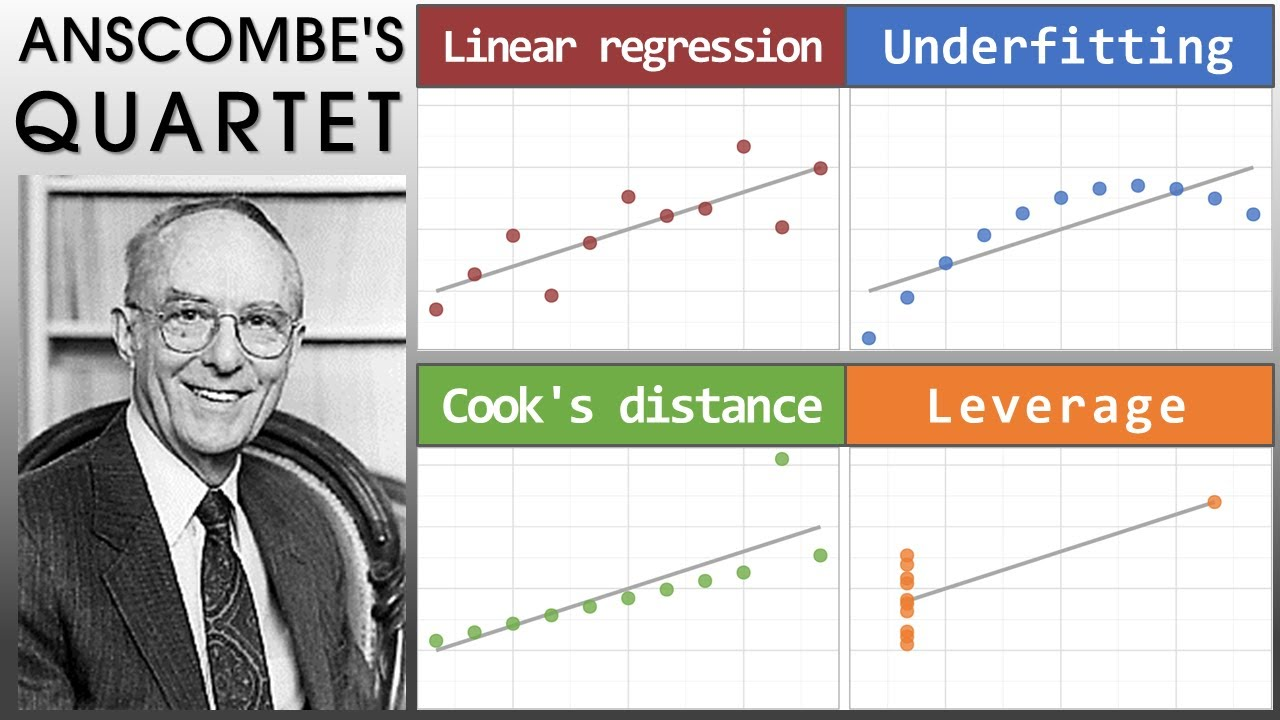

In [149]:
import os
from IPython.display import Image

path = "C:\\Users\\pkucharzak\\Desktop\\CAR_PYTHON_POWER_BI\\Anscombes Quartet.jpg"
Image(path, height = 800, width = 800)



    - The Graphical Anscombe's Quartet is a set of four datasets that have nearly identical statistical properties but very different graphical representations.
    - The datasets were created by Francis Anscombe in 1973 to demonstrate the importance of graphical exploration of data and to illustrate the pitfalls of relying solely on summary statistics.
    - Each dataset consists of eleven (x, y) pairs and has the same mean, variance, correlation, and regression line as the other three datasets.
    - The first dataset has a linear relationship between x and y, the second has a non-linear relationship, the third has an outlier, and the fourth has a cluster of points.
    - When visualized, the datasets look vastly different, highlighting the importance of graphing data and not relying solely on summary statistics.
    - The Graphical Anscombe's Quartet is often used in statistics education to illustrate the importance of data visualization and exploratory data analysis.
    - The quartet demonstrates that different datasets can have identical summary statistics and yet exhibit very different properties when visualized.

# Linear Regression

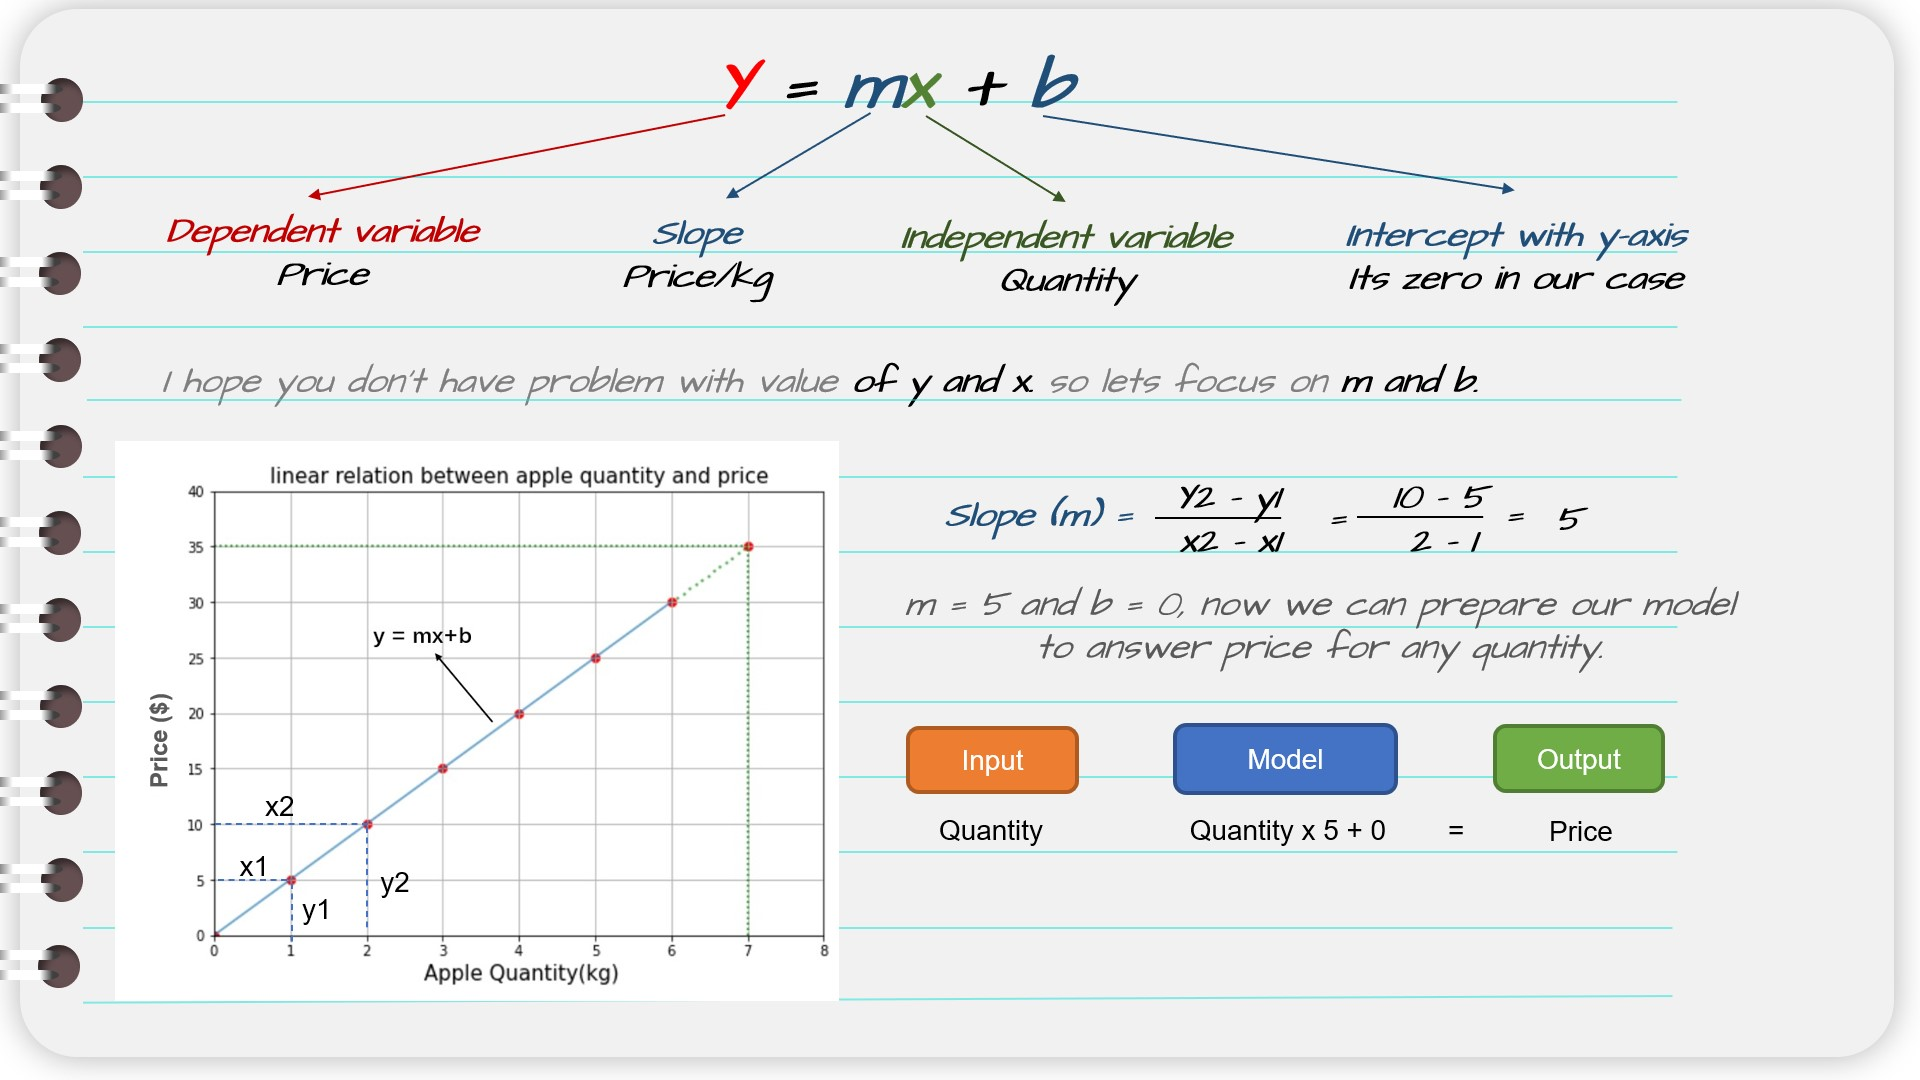

In [150]:
path = "C:\\Users\\pkucharzak\\Desktop\\CAR_PYTHON_POWER_BI\\Linear regression formula.jpg"
Image(path, height = 800, width = 800)

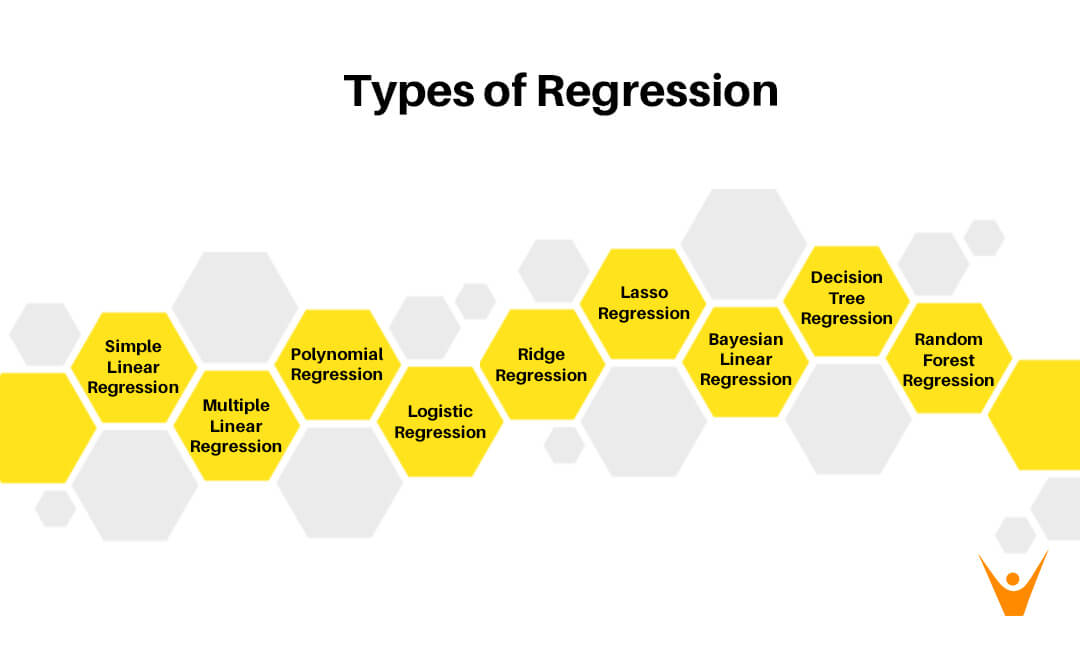

In [151]:
path = "C:\\Users\\pkucharzak\\Desktop\\CAR_PYTHON_POWER_BI\\Types_of_Regression.jpg"
Image(path, height = 800, width = 800)

In [152]:
# Training regression

lin = LinearRegression(fit_intercept=True)
lin.fit(X_train,y_train)

y_pred = lin.predict(X_train)

In [191]:
# Model Accuracy on testing dataset 

print('The Accuracy  on the training dataset is: ', lin.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lin.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',np.sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',np.sqrt(mean_squared_error(y_test,lin.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lin.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lin.coef_ )

print("")
# The Intercept
print('Intercept: ', lin.intercept_)

The Accuracy  on the training dataset is:  0.939012854622914
The Accuracy r2  on the training dataset prediction is:  0.939012854622914

The Accuracy  on the testing dataset is:  0.8508618050905903

The RMSE  on the training dataset is:  1943.8483950356278
The RMSE  on the testing dataset is:  3224.5179693901036

The MAE  on the training dataset is:  1422.026198600296
The MAE  on the testing dataset is:  2273.470675281675

Coefficients:  [-15.330950 310.151322 59.886408 -29.377917 546.770707 323.313594 5.310580
 176.711113 -8126.107835 -5483.145262 -786.406633 13.581598 2.554469
 -10.337758 212.293090 -1430.395287 3085.668953 -1977.929992 157.227140
 136.622407 -1401.588508 -633.439236 633.439236 170.495715 -170.495715
 -721.843059 -891.009633 1612.852691 -4227.250691 4227.250691 -1039.568450
 752.677402 650.137888 3709.099959 -2488.091529 1313.157971 -1376.357399
 -1521.055842 -2566.560595 3601.273250 -3836.289677 972.667940 2115.205993
 -5921.093144 5634.796234 3709.099959 -3709.0999


Notes:

    - The accuracy score represents the coefficient of determination ( 𝑅2 ). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.

    - The R Square is measure of how close the data are to the fitted regression line.

    - In this case we can say that our model explains 95% of the training data & 85% of the testing data

    - The RMSE is the standard deviation of the residuals. Residuals is the difference between the predicted value and the regression line. Hence RMSE is a measure of how spread your residuals are.

    - The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).

    - Coeff are the weights

    - The intercept is the expected mean value of Y when all X=0



# Putting prediction prices into one data table


In [154]:
df.shape

(205, 26)

In [155]:
new_df.shape

(205, 48)

In [157]:
X_columns = new_df.drop(['price'], axis = 1)

In [164]:
# creating dataframe from previus build datasets

# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
print(final_df.shape)
final_df

final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = lin.predict(X_test)
print(final_df2.shape)
final_df2

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()

# Left Joining to the original dataset the predictions

final_df4 = df.merge(final_df3[['car_ID','Phase','Price Predictions']], how = 'left', on = 'car_ID')
print(final_df4.shape)
final_df4.head()

(164, 50)
(41, 50)
(205, 50)
(205, 28)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cylindernr,Phase,Price Predictions
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,4,Existing data,16208.877656
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,4,Existing data,16193.546706
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,6,New unseen data,16454.764372
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,4,Existing data,12118.507392
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,5,Existing data,18397.855496


In [171]:
# Another way of adding prediction model into table

final_df4.insert(26,'Pred',lin.predict(X))

In [172]:
final_df4

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cylindernr,Pred,Phase,Price Predictions
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,4,16208.877656,Existing data,16208.877656
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,4,16193.546706,Existing data,16193.546706
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,6,16454.764372,New unseen data,16454.764372
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,4,12118.507392,Existing data,12118.507392
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,5,18397.855496,Existing data,18397.855496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,4,18118.140766,Existing data,18118.140766
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,4,20233.041099,Existing data,20233.041099
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,6,17534.606720,Existing data,17534.606720
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,6,20791.712233,New unseen data,20791.712233


In [194]:
# Save table which will be used now itno power BI with our CAR PREDICITON value
final_df4.to_csv('car_preditions.csv')